<a href="https://colab.research.google.com/github/dodyks/Final-Project-MySkill-Python/blob/main/Final_Project_MySkill_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [54]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [55]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [56]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [57]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [58]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [59]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [60]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [61]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [62]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [63]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [64]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [65]:
#Menyimpan data dalam bentuk Pandas DataFrame
data1 = pd.DataFrame(
                     #Memfilter data dengan valid=1
                     df[
                        (df['is_valid']==1) &
                        #Memfilter data dengan Category = Mobiles & Tablets
                        (df['category']=='Mobiles & Tablets') &
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     #Pengelompokan berdasarkan penjumlahan
                     .groupby(by=["sku_name"])["qty_ordered"].sum()
                     #Mengurutkan data
                     .sort_values(ascending=False)
                     #Mengambil TOP 5 Produk
                     .head()
                     #Mereset nama header
                     .reset_index(name='qty_2022')
                     )
data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


<Axes: title={'center': 'TOP 5 Product'}, xlabel='Quntity', ylabel='Product Name'>

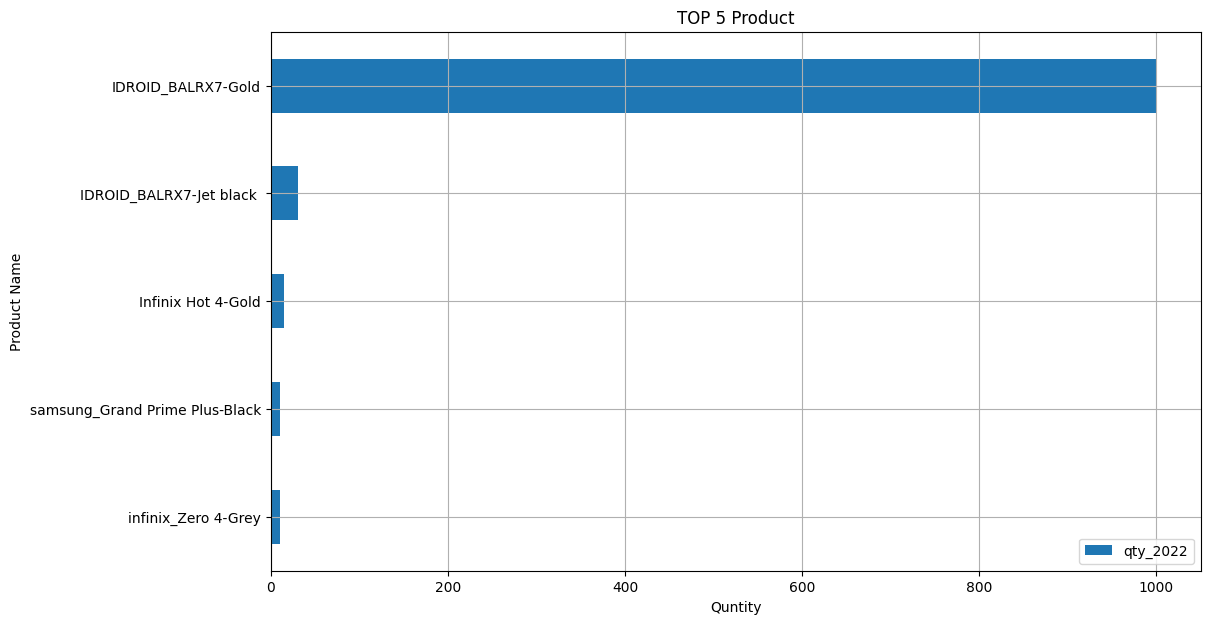

In [66]:
#Sort data untuk dapat digunakan sebagai grafik
data1.sort_values(
                  by=['qty_2022'],
                  ascending=True,
                  inplace=True)


#Membuat grafik
data1.plot(x='sku_name',
           y=['qty_2022'],
           kind='barh',
           grid = True,
           xlabel = 'Quntity',
           ylabel = 'Product Name',
           figsize=(12,7),
           title = 'TOP 5 Product',
           table = False)

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

## `Jawaban No 2.1`

In [67]:
#Menyimpan data dalam bentuk Pandas DataFrame
data2 = pd.DataFrame(
                     df[
                        #Memfilter data dengan valid=1
                        (df['is_valid']==1) &
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
                        ]
                     #Pengelompokan berdasarkan penjumlahan
                     .groupby(by=df['category'])["qty_ordered"].sum()
                     #Mengurutkan data
                     .sort_values(ascending=False)
                     #Mereset nama header
                     .reset_index(name='qty_2021')
                     )
data2

,category,qty_2021
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [68]:
#Menyimpan data dalam bentuk Pandas DataFrame
data3 = pd.DataFrame(
                     df[
                        #Memfilter data dengan valid=1
                        (df['is_valid']==1) &
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     #Pengelompokan berdasarkan penjumlahan
                     .groupby(by=df['category'])["qty_ordered"].sum()
                     #Mengurutkan data
                     .sort_values(ascending=False)
                     #Mereset nama header
                     .reset_index(name='qty_2022')
                     )
data3

,category,qty_2022
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


In [69]:
#Menggabungkan data
data4 = data2.merge(data3, left_on = 'category', right_on = 'category')
data4

,category,qty_2021,qty_2022
0,Soghaat,759,612
1,Others,426,263
2,Superstore,327,536
3,Men Fashion,237,175
4,Home & Living,193,250
5,School & Education,184,237
6,Health & Sports,173,200
7,Books,171,195
8,Kids & Baby,170,227
9,Beauty & Grooming,168,153


In [70]:
#Growth = tahun 2022 - tahun 2021
data4['qty_growth']=data4['qty_2022']-data4['qty_2021']
data4.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data4

,category,qty_2021,qty_2022,qty_growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


## `Jawaban No 2.2`

In [71]:
#Menyimpan data dalam bentuk Pandas DataFrame
data5 = pd.DataFrame(
                     df[
                        #Memfilter data dengan valid=1
                        (df['is_valid']==1) &
                        #Memfilter data kategori others
                        (df['category']=='Others') &
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
                        ]
                     #Pengelompokan berdasarkan penjumlahan
                     .groupby(by=df['sku_name'])["qty_ordered"].sum()
                     #Mengurutkan data
                     .sort_values(ascending=False)
                     #Mereset nama header
                     .reset_index(name='qty_2021')
                     )
data5

,sku_name,qty_2021
0,RB_Dettol Germ Busting Kit-bf,200
1,Telemall_MM-DR-HB-L,23
2,Dawlance_MD 10 + DWB 600,23
3,iu_Tickets General Enclosure-Islamabad,20
4,RS_Rehmat-e-Shereen Mix Mithai,13
...,...,...
82,MEGUIAR_G13115,1
83,MEGUIAR_G12718,1
84,MEGUIAR_G10307,1
85,MEGUIAR_A2116,1


In [72]:
#Menyimpan data dalam bentuk Pandas DataFrame
data6 = pd.DataFrame(
                     df[
                        #Memfilter data dengan valid=1
                        (df['is_valid']==1) &
                        #Memfilter data kategori others
                        (df['category']=='Others') &
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
                        ]
                     #Pengelompokan berdasarkan penjumlahan
                     .groupby(by=df['sku_name'])["qty_ordered"].sum()
                     #Mengurutkan data
                     .sort_values(ascending=False)
                     #Mereset nama header
                     .reset_index(name='qty_2022')
                     )
data6

,sku_name,qty_2022
0,RB_Dettol Germ Busting Kit-bf,45
1,emart_Tyre Shape Air Compressor,34
2,SKMT_Medicine,20
3,shoppers stop_MagicGlass-3,13
4,TCF_Educate-a-Child-for-a-Month,8
...,...,...
94,Z&A_ZEES-0122,1
95,Kansai_High Heat Auto _ Aluminium,1
96,audionic_Shock-2,1
97,Kansai_Auto_Camouflag_Olive,1


In [73]:
#Menggabungkan data
data_check = data5.merge(data6, how='outer')
data_check.fillna(0, inplace=True)

#Growth = tahun 2022 - tahun 2021
data_check['qty_growth']=data_check['qty_2022']-data_check['qty_2021']
data_check.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data_check = data_check.head(20)
data_check

,sku_name,qty_2021,qty_2022,qty_growth
0,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
2,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
1,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
3,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
4,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
5,kansai_NeverWet,10.0,1.0,-9.0
6,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
7,emart_00-1,7.0,1.0,-6.0
8,Vouch 365 2016,5.0,0.0,-5.0
10,Am-PTV_ATS-004-M,5.0,0.0,-5.0


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

## `Jawaban No 3`

In [74]:
#Menyimpan data dalam bentuk Pandas DataFrame
data8 = df[
            #Memfilter data dengan gross=1
            (df['is_gross']==1) &
            #Memfilter data dengan valid=0
            (df['is_valid']==0) &
            #Memfilter data dengan net=0
            (df['is_net']==0) &
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
            ]
data8

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
9,ODR9699658949w,C246762L,2022-05-21,P168052,6487648,1,6487648,638000,5849648,1,0,0,7,Easypay,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2022-05-08
18,ODR1965502162e,C848774L,2022-05-20,P168052,6487648,1,6487648,364812,6122835,1,0,0,2,jazzvoucher,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2021-11-07
19,ODR8450052777q,C693415L,2022-04-15,P132718,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Gray,5626000,4219500,Mobiles & Tablets,2022-04-12
21,ODR7673587024b,C180595L,2022-04-17,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-22
22,ODR7333927150n,C587425L,2022-12-04,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,ODR2291109358n,C394076L,2022-02-22,P800680,58,2,116,0,116,1,0,0,4,Payaxis,test-product-00,290,174,Others,2021-10-12
5859,ODR4338250762i,C248585L,2022-01-08,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-10
5865,ODR4656313388n,C471304L,2022-05-16,P194155,0,1,0,0,0,1,0,0,6,easypay_voucher,Bahr-e-Shifa,0,0,Books,2022-05-13
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17


In [75]:
data9 = data8[['customer_id','registered_date']]
data9

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

## `Jawaban No 4.1`

In [76]:
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11


In [77]:
data16 = pd.DataFrame(
                      df[
                         (df['is_valid']==1) &
                         (df['day'].isin(['Saturday','Sunday'])) &
                         (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')
                        ]
                     .groupby(by=["month_num","month"])["before_discount"].mean()
                     .round()
                     .sort_values(ascending=False)
                     .reset_index(name='avg_sales_weekend')
                     )
data16


,month_num,month,avg_sales_weekend
0,10,October,634260.0
1,11,November,607794.0
2,12,December,410599.0


In [82]:
data17 = pd.DataFrame(
                      df[
                         (df['is_valid']==1) &
                         (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) &
                         (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')
                        ]
                     .groupby(by=["month_num","month"])["before_discount"].mean()
                     .sort_values(ascending=False)
                     .round()
                     .reset_index(name='avg_sales_weekdays')
                     )
data17

,month_num,month,avg_sales_weekdays
0,10,October,874690.0
1,12,December,813574.0
2,11,November,641862.0


In [86]:
#Menggabungkan data
data18 = data16.merge(data17, left_on = 'month', right_on = 'month')
data18.sort_values(by='month_num_x', ascending=True, inplace=True)

#menampilkan output akhir
data18 = data18[["month","avg_sales_weekend","avg_sales_weekdays"]]
df_groupby_weekend = data18
df_groupby_weekend

,month,avg_sales_weekend,avg_sales_weekdays
0,October,634260.0,874690.0
1,November,607794.0,641862.0
2,December,410599.0,813574.0


In [87]:
#Membuat kolom tambahan untuk diff_value dan diff_percent
df_groupby_weekend['diff_value'] = df_groupby_weekend['avg_sales_weekend'] - df_groupby_weekend['avg_sales_weekdays']
df_groupby_weekend['diff_percent'] = round(df_groupby_weekend['diff_value']/df_groupby_weekend['avg_sales_weekend']*100)
df_groupby_weekend

,month,avg_sales_weekend,avg_sales_weekdays,diff_value,diff_percent
0,October,634260.0,874690.0,-240430.0,-38.0
1,November,607794.0,641862.0,-34068.0,-6.0
2,December,410599.0,813574.0,-402975.0,-98.0


<Axes: xlabel='Bulan', ylabel='Total'>

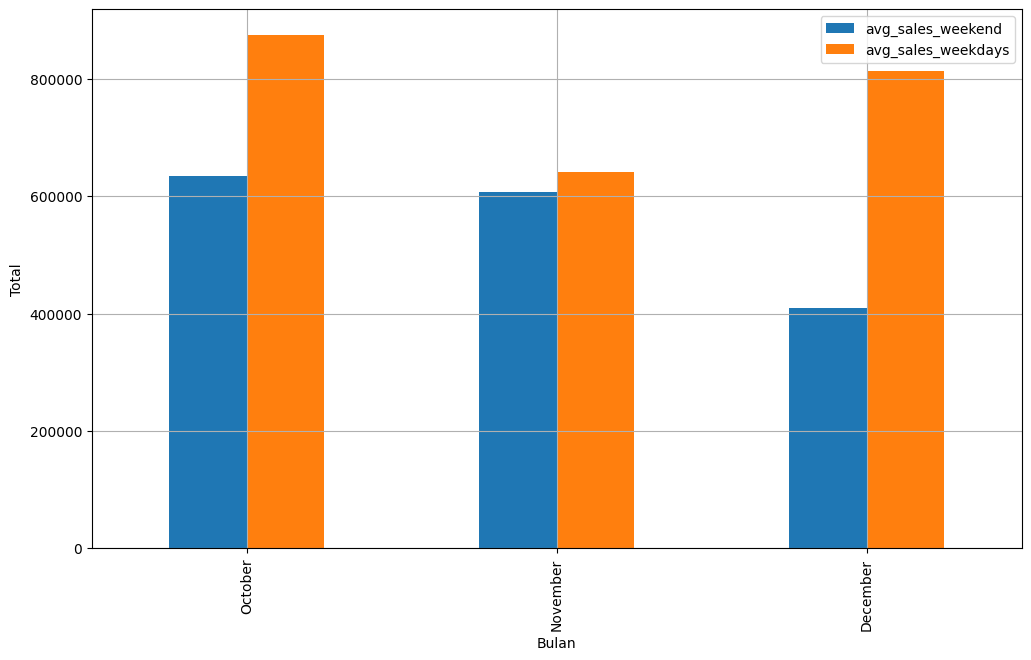

In [88]:
data18.plot(x='month',
           y=['avg_sales_weekend','avg_sales_weekdays'],
           kind='bar',
           grid = True,
           xlabel = 'Bulan',
           ylabel = 'Total',
           figsize=(12,7),
           rot = 90,
           table = False,)

## `Jawaban No 4.2`

In [89]:
#Menyimpan data dalam bentuk Pandas DataFrame
weekend_2022 = df[
                #Memfilter data dengan valid=1
                (df['is_valid']==1) &
                (df['day'].isin(['Saturday','Sunday'])) &
                #Memfilter data pada transaksi selama 2022
                ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))
                 ]

In [90]:
#Menyimpan data dalam bentuk Pandas DataFrame
weekday_2022 = df[
                  #Memfilter data dengan valid=1
                  (df['is_valid']==1) &
                  (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday'])) &
                  #Memfilter data pada transaksi selama 2022
                  ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))
                  ]

In [91]:
data21 = {
          'Periode':'Total 3 months',\
          'Avg Weekend Sales': round(weekend_2022['before_discount'].mean(),2),
          'Avg Weekdays Sales': round(weekday_2022['before_discount'].mean(),2),
          'Diff (Value)': round(weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean(),2),
          'Diff (%)': pd.Series(round(((weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean())/weekend_2022['before_discount'].mean())*100,2))
          }
pd.DataFrame(data=data21)

,Periode,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,558865.15,751972.85,-193107.7,-34.55
